# Stellar Classification

## Dataset

https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17

## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

## Importing the dataset

In [2]:
dataset = pd.read_csv("star_classification.csv")

In [3]:
dataset

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,GALAXY,0.000000,9374,57749,438
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,GALAXY,0.404895,7626,56934,866
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,GALAXY,0.143366,2764,54535,74
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [5]:
dataset.isna().sum(axis=0)

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

## Data Preprocessing

In [6]:
le = LabelEncoder()
dataset["class"] = le.fit_transform(dataset["class"])
print(le.classes_)

['GALAXY' 'QSO' 'STAR']


In [7]:
y = dataset["class"]
y

0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: class, Length: 100000, dtype: int32

In [8]:
print("GALAXY(0) sınıfına ait veri sayısı =", y[y==0].count())
print("QSO(1) sınıfına ait veri sayısı =", y[y==1].count())
print("STAR(2) sınıfına ait veri sayısı =", y[y==2].count())

GALAXY(0) sınıfına ait veri sayısı = 59445
QSO(1) sınıfına ait veri sayısı = 18961
STAR(2) sınıfına ait veri sayısı = 21594


In [9]:
dataset.drop("class", axis=1, inplace=True)

In [10]:
X = dataset.values
y = y.values

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 12)

In [12]:
print("Eğitim verileri =", X_train.shape)
print("Eğitim etiketleri =", y_train.shape)
print("Test verileri =", X_test.shape)
print("Test etiketleri =", y_test.shape)

Eğitim verileri = (70000, 17)
Eğitim etiketleri = (70000,)
Test verileri = (30000, 17)
Test etiketleri = (30000,)


In [13]:
print("Eğitim için GALAXY(0) sınıfına ait veri sayısı =", len(y_train[y_train==0]))
print("Eğitim için QSO(1) sınıfına ait veri sayısı =", len(y_train[y_train==1]))
print("Eğitim için STAR(2) sınıfına ait veri sayısı =", len(y_train[y_train==2]))
print("Test için GALAXY(0) sınıfına ait veri sayısı =", len(y_test[y_test==0]))
print("Test için QSO(1) sınıfına ait veri sayısı =", len(y_test[y_test==1]))
print("Test için STAR(2) sınıfına ait veri sayısı =", len(y_test[y_test==2]))

Eğitim için GALAXY(0) sınıfına ait veri sayısı = 41600
Eğitim için QSO(1) sınıfına ait veri sayısı = 13394
Eğitim için STAR(2) sınıfına ait veri sayısı = 15006
Test için GALAXY(0) sınıfına ait veri sayısı = 17845
Test için QSO(1) sınıfına ait veri sayısı = 5567
Test için STAR(2) sınıfına ait veri sayısı = 6588


In [14]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [15]:
results = []

## Decision Tree Classifier

In [16]:
classifier1 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier1.fit(X_train, y_train)
y_pred = classifier1.predict(X_test)
results.append(["Decision Tree Classifier", classification_report(y_test, y_pred, target_names=['GALAXY', 'QSO', 'STAR'], digits=4)])

## AdaBoost Classifier

In [17]:
classifier2 = AdaBoostClassifier(n_estimators=1000, learning_rate=0.1, random_state=0)
classifier2.fit(X_train, y_train)
y_pred = classifier2.predict(X_test)
results.append(["AdaBoost Classifier", classification_report(y_test, y_pred, target_names=['GALAXY', 'QSO', 'STAR'], digits=4)])

## Gradient Boosting Classifier

In [18]:
classifier3 = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.1, max_depth=1, random_state=0)
classifier3.fit(X_train, y_train)
y_pred = classifier3.predict(X_test)
results.append(["Gradient Boosting Classifier", classification_report(y_test, y_pred, target_names=['GALAXY', 'QSO', 'STAR'], digits=4)])

## Extra-Trees Classifier

In [19]:
classifier4 = ExtraTreesClassifier(n_estimators=5000, random_state=0)
classifier4.fit(X_train, y_train)
y_pred = classifier4.predict(X_test)
results.append(["Extra-Trees Classifier", classification_report(y_test, y_pred, target_names=['GALAXY', 'QSO', 'STAR'], digits=4)])

## Random Forest Classifier

In [20]:
classifier5 = RandomForestClassifier()
classifier5.fit(X_train, y_train)
y_pred = classifier5.predict(X_test)
results.append(["Random Forest Classifier", classification_report(y_test, y_pred, target_names=['GALAXY', 'QSO', 'STAR'], digits=4)])

## Results

In [21]:
for name, report in results:
    print("----------------------------------------------------------------------------------------------")
    print()
    print(name)
    print(report)
    print()

----------------------------------------------------------------------------------------------

Decision Tree Classifier
              precision    recall  f1-score   support

      GALAXY     0.9722    0.9723    0.9722     17845
         QSO     0.9159    0.9161    0.9160      5567
        STAR     0.9954    0.9951    0.9953      6588

    accuracy                         0.9669     30000
   macro avg     0.9612    0.9612    0.9612     30000
weighted avg     0.9669    0.9669    0.9669     30000


----------------------------------------------------------------------------------------------

AdaBoost Classifier
              precision    recall  f1-score   support

      GALAXY     0.7612    0.9918    0.8613     17845
         QSO     0.8421    0.0029    0.0057      5567
        STAR     0.9785    0.9994    0.9888      6588

    accuracy                         0.8100     30000
   macro avg     0.8606    0.6647    0.6186     30000
weighted avg     0.8239    0.8100    0.7306     30000



## Random Forest Classifier Feature Importance

<AxesSubplot:>

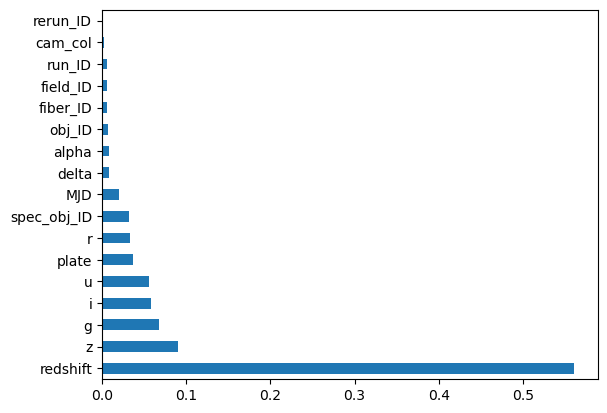

In [22]:
feature_imp = pd.Series(classifier5.feature_importances_, index= dataset.columns)
feature_imp.nlargest(17).plot(kind='barh')

In [23]:
X = pd.DataFrame(X, columns=dataset.columns)
X

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606.0,301.0,2.0,79.0,6.543777e+18,0.634794,5812.0,56354.0,171.0
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518.0,301.0,5.0,119.0,1.176014e+19,0.779136,10445.0,58158.0,427.0
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606.0,301.0,2.0,120.0,5.152200e+18,0.644195,4576.0,55592.0,299.0
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192.0,301.0,3.0,214.0,1.030107e+19,0.932346,9149.0,58039.0,775.0
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102.0,301.0,3.0,137.0,6.891865e+18,0.116123,6121.0,56187.0,842.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778.0,301.0,2.0,581.0,1.055431e+19,0.000000,9374.0,57749.0,438.0
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917.0,301.0,1.0,289.0,8.586351e+18,0.404895,7626.0,56934.0,866.0
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314.0,301.0,4.0,308.0,3.112008e+18,0.143366,2764.0,54535.0,74.0
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650.0,301.0,4.0,131.0,7.601080e+18,0.455040,6751.0,56368.0,470.0


In [24]:
X.drop(["run_ID", "rerun_ID", "cam_col", "field_ID", "fiber_ID", "obj_ID", "alpha"], axis=1, inplace=True)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 12)

In [26]:
print("Eğitim verileri =", X_train.shape)
print("Eğitim etiketleri =", y_train.shape)
print("Test verileri =", X_test.shape)
print("Test etiketleri =", y_test.shape)

Eğitim verileri = (70000, 10)
Eğitim etiketleri = (70000,)
Test verileri = (30000, 10)
Test etiketleri = (30000,)


In [27]:
print("Eğitim için GALAXY(0) sınıfına ait veri sayısı =", len(y_train[y_train==0]))
print("Eğitim için QSO(1) sınıfına ait veri sayısı =", len(y_train[y_train==1]))
print("Eğitim için STAR(2) sınıfına ait veri sayısı =", len(y_train[y_train==2]))
print("Test için GALAXY(0) sınıfına ait veri sayısı =", len(y_test[y_test==0]))
print("Test için QSO(1) sınıfına ait veri sayısı =", len(y_test[y_test==1]))
print("Test için STAR(2) sınıfına ait veri sayısı =", len(y_test[y_test==2]))

Eğitim için GALAXY(0) sınıfına ait veri sayısı = 41600
Eğitim için QSO(1) sınıfına ait veri sayısı = 13394
Eğitim için STAR(2) sınıfına ait veri sayısı = 15006
Test için GALAXY(0) sınıfına ait veri sayısı = 17845
Test için QSO(1) sınıfına ait veri sayısı = 5567
Test için STAR(2) sınıfına ait veri sayısı = 6588


In [28]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [29]:
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['GALAXY', 'QSO', 'STAR'], digits=4))

              precision    recall  f1-score   support

      GALAXY     0.9787    0.9876    0.9831     17845
         QSO     0.9657    0.9312    0.9481      5567
        STAR     0.9940    0.9997    0.9968      6588

    accuracy                         0.9798     30000
   macro avg     0.9795    0.9728    0.9760     30000
weighted avg     0.9797    0.9798    0.9796     30000



## Data Balancing

<AxesSubplot:ylabel='count'>

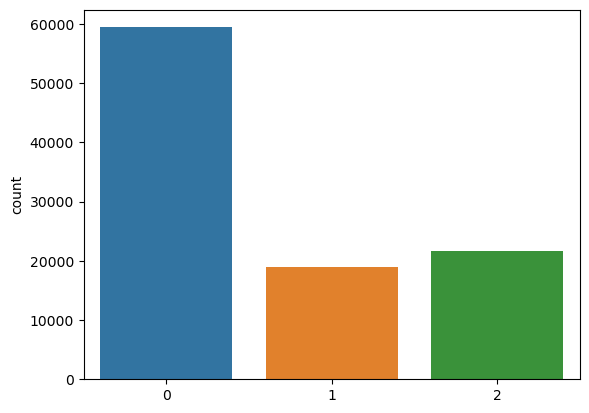

In [30]:
sns.countplot(x=y)

In [31]:
sm = SMOTE(random_state=42)
X, y = sm.fit_resample(X, y)

<AxesSubplot:ylabel='count'>

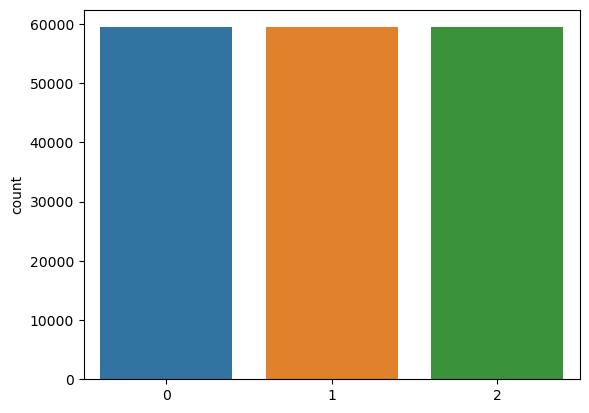

In [32]:
sns.countplot(x=y)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 12)

In [34]:
print("Eğitim verileri =", X_train.shape)
print("Eğitim etiketleri =", y_train.shape)
print("Test verileri =", X_test.shape)
print("Test etiketleri =", y_test.shape)

Eğitim verileri = (124834, 10)
Eğitim etiketleri = (124834,)
Test verileri = (53501, 10)
Test etiketleri = (53501,)


In [35]:
print("Eğitim için GALAXY(0) sınıfına ait veri sayısı =", len(y_train[y_train==0]))
print("Eğitim için QSO(1) sınıfına ait veri sayısı =", len(y_train[y_train==1]))
print("Eğitim için STAR(2) sınıfına ait veri sayısı =", len(y_train[y_train==2]))
print("Test için GALAXY(0) sınıfına ait veri sayısı =", len(y_test[y_test==0]))
print("Test için QSO(1) sınıfına ait veri sayısı =", len(y_test[y_test==1]))
print("Test için STAR(2) sınıfına ait veri sayısı =", len(y_test[y_test==2]))

Eğitim için GALAXY(0) sınıfına ait veri sayısı = 41715
Eğitim için QSO(1) sınıfına ait veri sayısı = 41496
Eğitim için STAR(2) sınıfına ait veri sayısı = 41623
Test için GALAXY(0) sınıfına ait veri sayısı = 17730
Test için QSO(1) sınıfına ait veri sayısı = 17949
Test için STAR(2) sınıfına ait veri sayısı = 17822


In [36]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [37]:
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['GALAXY', 'QSO', 'STAR'], digits=4))

              precision    recall  f1-score   support

      GALAXY     0.9706    0.9798    0.9751     17730
         QSO     0.9830    0.9706    0.9768     17949
        STAR     0.9966    0.9999    0.9983     17822

    accuracy                         0.9834     53501
   macro avg     0.9834    0.9834    0.9834     53501
weighted avg     0.9834    0.9834    0.9834     53501

